In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix , f1_score, accuracy_score,precision_score , recall_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import joblib

In [2]:
data = pd.read_csv('finalized_preprocessed_data.csv')

In [3]:
X = data.drop(columns='is_fraud')
y = data['is_fraud']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [4]:
#doing XG boost implementation
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
#reduce train and create another test set 
X_sample, X_sampletest, y_sample, y_sampletest = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
''' dont run
parameters_grid = {
    'n_estimators': [200,500, 1000],
    'max_depth': [4,6,8],
    'learning_rate': [0.05 ,0.1],
    'subsample': [0.7, 0.8],

}
xgboost_model = XGBClassifier(**parameters_grid)
random_search = RandomizedSearchCV(estimator=xgboost_model, param_distributions=parameters_grid, n_iter=20, cv=3, random_state=42, n_jobs=-1 , verbose=2)
random_search.fit(X_sample, y_sample)  
y_pred = random_search.predict(X_test)

'''

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END learning_rate=0.05, max_depth=8, n_estimators=200, subsample=0.8; total time= 1.5min
[CV] END learning_rate=0.05, max_depth=8, n_estimators=200, subsample=0.8; total time= 1.4min
[CV] END learning_rate=0.05, max_depth=8, n_estimators=200, subsample=0.8; total time= 1.5min
[CV] END learning_rate=0.1, max_depth=8, n_estimators=1000, subsample=0.8; total time= 6.5min
[CV] END learning_rate=0.1, max_depth=8, n_estimators=1000, subsample=0.8; total time= 6.5min
[CV] END learning_rate=0.1, max_depth=8, n_estimators=1000, subsample=0.8; total time= 6.7min
[CV] END learning_rate=0.1, max_depth=6, n_estimators=500, subsample=0.7; total time= 2.4min
[CV] END learning_rate=0.1, max_depth=8, n_estimators=200, subsample=0.7; total time= 1.3min
[CV] END learning_rate=0.1, max_depth=8, n_estimators=200, subsample=0.7; total time= 1.4min
[CV] END learning_rate=0.1, max_depth=6, n_estimators=500, subsample=0.7; total time= 2.3min
[CV

In [ ]:
#xgbmodel = joblib.dump(random_search, 'xgboost_model.pkl')

In [7]:
xgbmodel = joblib.load("xgboost_model.pkl")

In [8]:
y_pred = xgbmodel.predict(X_test)

f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)



metric = {
    "f1_score": f1,
    "precision": precision,
    "recall": recall}

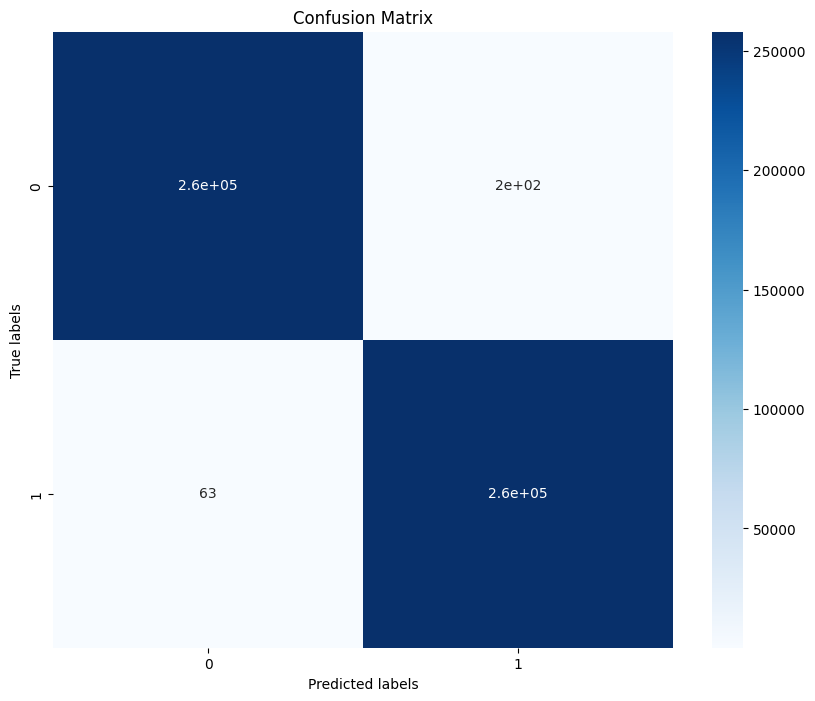

In [9]:
#plot the confusion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap="Blues")

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
'''
import mlflow 
import mlflow.sklearn

client = mlflow.tracking.MlflowClient()
mlflow.set_tracking_uri("http://127.0.0.1:8080")
'''

In [ ]:
'''
experiment_description = "Credit Card Fraud Detection-Xgboost"
experiment_tags = {
    "model_type": "Xgboost",
    "dataset": "Credit Card Fraud",
    "model_version": "v1"
}

produced_model = client.create_experiment(
    name="XGBoost-credit_card Fraud_dectection",
    artifact_location="./mlruns",
    tags=experiment_tags
)
'''

Traceback (most recent call last):
  File "/home/seven/Internship/venv/lib/python3.12/site-packages/mlflow/store/tracking/file_store.py", line 367, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/seven/Internship/venv/lib/python3.12/site-packages/mlflow/store/tracking/file_store.py", line 465, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/seven/Internship/venv/lib/python3.12/site-packages/mlflow/store/tracking/file_store.py", line 1635, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/seven/Internship/venv/lib/python3.12/site-packages/mlflow/store/tracking/file_store.py", line 1628, in _read_helper
    result = read_yaml(root, file_name)
    

In [11]:
report = classification_report(y_test, y_pred, output_dict=True)
report

{'0': {'precision': 0.999755143920962,
  'recall': 0.9992308558864774,
  'f1-score': 0.9994929311493755,
  'support': 257429.0},
 '1': {'precision': 0.9992329981251066,
  'recall': 0.9997558262568165,
  'f1-score': 0.9994943438190798,
  'support': 258013.0},
 'accuracy': 0.9994936384695077,
 'macro avg': {'precision': 0.9994940710230342,
  'recall': 0.9994933410716469,
  'f1-score': 0.9994936374842276,
  'support': 515442.0},
 'weighted avg': {'precision': 0.9994937752253066,
  'recall': 0.9994936384695077,
  'f1-score': 0.9994936382845108,
  'support': 515442.0}}

In [25]:
input_example = pd.DataFrame(X_train[:5], columns = X_train.columns)
with mlflow.start_run(experiment_id=produced_model) as run:
    mlflow.log_param("param_grid", random_search.get_params())
    mlflow.log_metrics(metric)
    mlflow.log_dict(report, "classification_report.json")
    mlflow.lightgbm.log_model(random_search, "model",input_example=input_example)

2025/09/26 14:28:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/home/seven/Internship/venv/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/home/seven/Internship/venv/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema conta

🏃 View run popular-calf-909 at: http://127.0.0.1:8080/#/experiments/286390164777232976/runs/f7ef51e59fd44bae97d6bcc884149457
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/286390164777232976


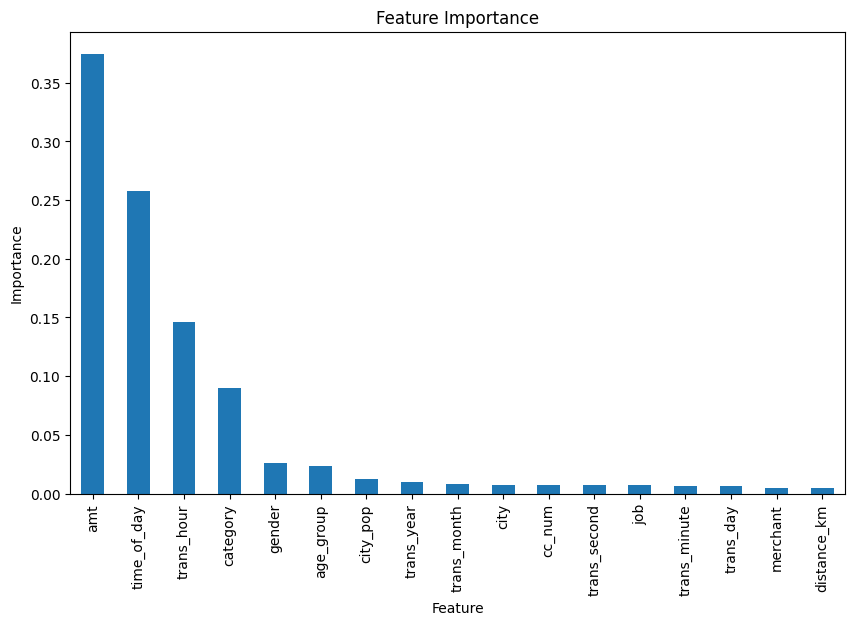

In [32]:
import matplotlib.pyplot as plt

# Access the best estimator (XGBClassifier) from RandomizedSearchCV
feature_importance = xgbmodel.best_estimator_.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False, figsize=(10,6))
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

/home/seven/Internship/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


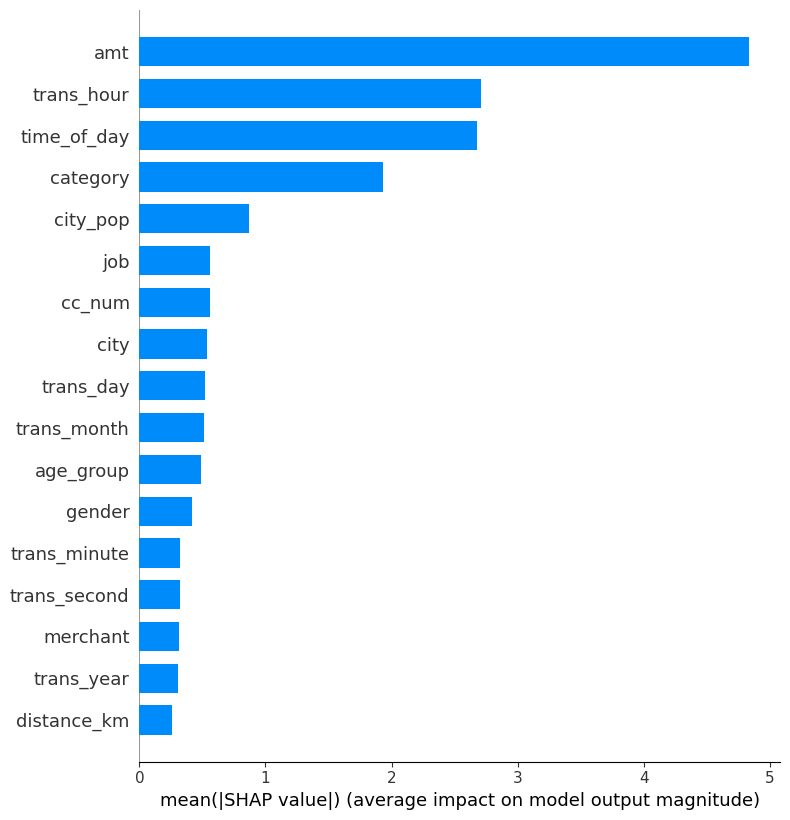

In [12]:
#using shap
import shap
explainer = shap.TreeExplainer(xgbmodel.best_estimator_)
sample_X = X_test.sample(n = 1000, random_state = 42)

shap_values = explainer.shap_values(sample_X)
shap.summary_plot(shap_values, sample_X, plot_type="bar", show=False)